In [ ]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#df = pd.read_csv("sample_data/livetweets_data_no_json.csv",encoding='latin1', skipinitialspace=True)
#df.head()
#pd.read_csv("sample_data/livetweets_data_no_json.csv",encoding='latin1', skipinitialspace=True)

In [ ]:

#df = pd.read_csv("sample_data/livetweets_data_no_json.csv")
df = pd.read_csv("/content/drive/My Drive/livetweets_data_no_json.csv")

#df.head()

<ipython-input-59-d54dd619dd98>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/My Drive/livetweets_data_no_json.csv")


In [ ]:
df

,tweet_id,tweet_date,tweet_screen_name,tweet_text
0,1096977737930158080,2019-02-17,gabrielguerronv,@AlexTonello5RC @CompromisoRC5 @PaolaPabonC @M...
1,1096977884848082944,2019-02-17,jhonav00,@PaolaPabonC @CompromisoRC5 @MashiRafael @Alex...
2,1096981630881882113,2019-02-17,Cristhyn3000,Que importante ha sido sentir el calor de los ...
3,1096982892759130112,2019-02-17,PelotonFusilero,Mi campaña no tiene pactos políticos ni aporte...
4,1096983080072556544,2019-02-17,carosu_92,¡Lo más avergonzarte que he visto cómo mujer! ...
...,...,...,...,...
1200844,1129745541066350595,2019-05-18,JuanPab86472867,Agradezco a tod@s l@s ciudadan@s del Ecuador e...
1200845,1129745558984417288,2019-05-18,Esteban_guido,Ahora hasta @LoroHomero y @alcaldiagye atende...
1200846,1129745580467605505,2019-05-18,stephoson,@VickyDesintonio No son 70 ni 80 ni 92 votos c...
1200847,1129745581528748033,2019-05-18,eloysorsa,Éxitos #VictoriaDeLaPatria ante la profunda de...


In [ ]:
df_candidatos = pd.read_csv("sample_data/account_info.csv")

In [ ]:
df_tweets = df.fillna("")

In [ ]:
#----------------------------------------LITERAL A--------------------------------------
# Filtra la tabla de candidatos solo para aquellos cuyos twitter_screen_name aparecen en la tabla de tweets
candidatos_filtrados = df_tweets[df_tweets['tweet_screen_name'].isin(df_candidatos['twitter_screen_name'])]
# Obtén la frecuencia de cada tweet_screen_name en la tabla de tweets

frecuencia_tweet_screen_name = candidatos_filtrados['tweet_screen_name'].value_counts()

# Muestra el resultado
top_10 = frecuencia_tweet_screen_name.head(10)
top_10


HernanUlloa        1183
abenavidesgol1     1070
wgomezr             804
jimmyjairala        662
LuisaMaldonadoM     574
LoroHomero          509
VickyDesintonio     477
CynthiaViteri6      357
fcojimenez21        335
davidroserow        305
Name: tweet_screen_name, dtype: int64

In [ ]:
#Tabla del Top 10
# Filtra la tabla de candidatos_filtrados solo para aquellos en el top 10
top_10_candidatos_filtrados = candidatos_filtrados[candidatos_filtrados['tweet_screen_name'].isin(top_10.index)]

top_10_candidatos_filtrados

# top_10_candidatos_filtrados2 = candidatos_filtrados[candidatos_filtrados['tweet_screen_name'].isin(top_10.index)]
# top_10_candidatos_filtrados2

,tweet_id,tweet_date,tweet_screen_name,tweet_text
21,1096984892318015489,2019-02-17,abenavidesgol1,Énner Valencia estuvo presente en las redes co...
152,1097006152498532353,2019-02-17,abenavidesgol1,Jairo Vélez cumplió destacada actuación en tri...
158,1097008003398672384,2019-02-17,LuisaMaldonadoM,Desde cada uno de los rincones de #Quito los q...
195,1097012227855564800,2019-02-17,abenavidesgol1,Pocos minutos en cancha estuvo Fernando Gaibor...
1157,1097162552348418050,2019-02-17,LoroHomero,Disfrutamos una linda noche en Barrio #ElConde...
...,...,...,...,...
1198815,1129607787313602561,2019-05-18,abenavidesgol1,Ecuador cuenta con primera lista de 40 jugador...
1198827,1129608232568283137,2019-05-18,VickyDesintonio,@VickyDesintonio Victoria de la Patria ✊🇪🇨
1198836,1129609424102936576,2019-05-18,abenavidesgol1,Vuelve a la senda del triunfo Independiente de...
1198884,1129613355231191040,2019-05-18,VickyDesintonio,@VickyDesintonio ha hecho un ejercicio de resi...


In [ ]:
agrupado_por_usuario = top_10_candidatos_filtrados.groupby('tweet_screen_name')['tweet_text'].apply(' '.join).reset_index(name='tweets_agrupados')
agrupado_por_usuario

,tweet_screen_name,tweets_agrupados
0,CynthiaViteri6,¡Buenos días guayaquileños! Ya estamos en vivo...
1,HernanUlloa,@HernanUlloa abogado se ganó mi respeto y admi...
2,LoroHomero,Disfrutamos una linda noche en Barrio #ElConde...
3,LuisaMaldonadoM,Desde cada uno de los rincones de #Quito los q...
4,VickyDesintonio,#ManabíEsVictoria\nAmigas y amigos deseo para ...
5,abenavidesgol1,Énner Valencia estuvo presente en las redes co...
6,davidroserow,"Martes 08:00 en Quito en el @CongopeEcuador, d..."
7,fcojimenez21,¡Seguimos recorriendo Guayaquil! Estamos en Me...
8,jimmyjairala,Se ve que los adversarios políticos de @jimmyj...
9,wgomezr,Comparto con ustedes mí Agenda de actividades ...


In [ ]:
# Preprocesamiento de texto

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('spanish'))  # Obtener stopwords en español
lemmatizer = WordNetLemmatizer()
irrelevant_words = ['http', 'q', 'x','si','no','cada','d']
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenización y conversión a minúsculas
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words and not any(word in token for word in irrelevant_words)]  # Eliminar stopwords y signos de puntuación
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]  # Lematización
    #processed_text = ' '.join(lemmatized_tokens)  # Unir los tokens en una cadena de texto
    #print(lemmatized_tokens)
    return lemmatized_tokens

# Aplicar preprocesamiento de texto a los tweets
agrupado_por_usuario['preprocessed_text'] = agrupado_por_usuario['tweets_agrupados'].apply(preprocess_text)
agrupado_por_usuario

,tweet_screen_name,tweets_agrupados,preprocessed_text
0,CynthiaViteri6,¡Buenos días guayaquileños! Ya estamos en vivo...,"[vivo, entrevista, aún, vamos, ir, allá, compe..."
1,HernanUlloa,@HernanUlloa abogado se ganó mi respeto y admi...,"[hernanulloa, ganó, respeto, casos, niñas, urb..."
2,LoroHomero,Disfrutamos una linda noche en Barrio #ElConde...,"[barrio, gracias, recibimiento, tan, emotivo, ..."
3,LuisaMaldonadoM,Desde cada uno de los rincones de #Quito los q...,"[rincones, muestran, apoyo, cariño, militante,..."
4,VickyDesintonio,#ManabíEsVictoria\nAmigas y amigos deseo para ...,"[manabíesvictoria, amigas, amigo, felizmartes,..."
5,abenavidesgol1,Énner Valencia estuvo presente en las redes co...,"[énner, valencia, presente, contrarias, triunf..."
6,davidroserow,"Martes 08:00 en Quito en el @CongopeEcuador, d...","[martes, propuestas, 24, marzo, cpccs, cpccs, ..."
7,fcojimenez21,¡Seguimos recorriendo Guayaquil! Estamos en Me...,"[santa, febres, propuesta, comerciantes, secto..."
8,jimmyjairala,Se ve que los adversarios políticos de @jimmyj...,"[ve, políticos, jimmyjairala, bajo, troll, vez..."
9,wgomezr,Comparto con ustedes mí Agenda de actividades ...,"[comparto, cañar, azuay, mañana, martes, feliz..."


In [ ]:
#--------------------------------LITERAL B-----------------------------------
from collections import Counter

# Crear un diccionario para almacenar las frecuencias
frecuencias_por_usuario = {}
frecuencias_palabras = []
# Iterar sobre cada fila del DataFrame
for index, row in agrupado_por_usuario.iterrows():
    tweet_screen_name = row['tweet_screen_name']
    preprocessed_text = row['preprocessed_text']

    # Contar las frecuencias de palabras en el texto preprocesado
    frecuencias_palabras = Counter(preprocessed_text).most_common(10)
    #print(frecuencias_palabras)
    print(frecuencias_palabras)
    # Almacenar las frecuencias en el diccionario, utilizando tweet_screen_name como clave
    frecuencias_por_usuario.setdefault(tweet_screen_name, []).append(frecuencias_palabras)
#print(frecuencias_por_usuario)
# Crear un DataFrame a partir del diccionario de frecuencias

df_frecuencias = pd.DataFrame(frecuencias_por_usuario).transpose().fillna(0)
df_frecuencias


[('progreso', 57), ('sueños', 49), ('bienestar', 45), ('junto', 43), ('obras', 43), ('seguiremos', 38), ('jóvenes', 38), ('vamos', 35), ('hoy', 32), ('futuro', 28)]
[('hernanulloa', 918), ('cpccs', 547), ('voto', 247), ('20', 153), ('cnegobec', 114), ('ulloa', 114), ('ser', 100), ('mejor', 95), ('nulo', 93), ('hernán', 82)]
[('lorohomero', 438), ('jorge', 81), ('gracias', 47), ('hoy', 32), ('trabajo', 29), ('sur', 29), ('19', 29), ('campaña', 28), ('apoyo', 25), ('electo', 25)]
[('compromisorc5', 172), ('pueblo', 77), ('hoy', 74), ('mashirafael', 66), ('5', 65), ('vamos', 59), ('trabajo', 57), ('luisa', 56), ('marzo', 55), ('gracias', 55)]
[('cpccs', 86), ('participación', 70), ('eleccionescpccs', 61), ('marzo', 58), ('pueblo', 57), ('consejo', 56), ('voto', 54), ('24', 49), ('mujeres', 45), ('victoriaescpccs', 45)]
[('triunfo', 226), ('copa', 93), ('liga', 85), ('goltvecu', 74), ('empate', 73), ('ligapro', 66), ('casa', 60), ('américa', 58), ('juego', 54), ('encuentro', 54)]
[('cpccs'

,0
CynthiaViteri6,"[(progreso, 57), (sueños, 49), (bienestar, 45)..."
HernanUlloa,"[(hernanulloa, 918), (cpccs, 547), (voto, 247)..."
LoroHomero,"[(lorohomero, 438), (jorge, 81), (gracias, 47)..."
LuisaMaldonadoM,"[(compromisorc5, 172), (pueblo, 77), (hoy, 74)..."
VickyDesintonio,"[(cpccs, 86), (participación, 70), (elecciones..."
abenavidesgol1,"[(triunfo, 226), (copa, 93), (liga, 85), (golt..."
davidroserow,"[(cpccs, 146), (voto, 76), (roseroalcpccs, 65)..."
fcojimenez21,"[(vamos, 56), (marzo, 49), (cambio, 43), (muni..."
jimmyjairala,"[(jimmyjairala, 202), (lee, 69), (uncafeconjj,..."
wgomezr,"[(wgomezr, 389), (cpccs, 281), (cnegobec, 233)..."


In [ ]:
from math import sqrt
import math
import numpy as np

# Crear una lista para almacenar las frecuencias de palabras por candidato
frecuencias_por_candidato = []
fre_cuadrado = 0
fre_sqrt = 0
long_euclidiana = []
# Iterar sobre cada fila del DataFrame
for index, row in agrupado_por_usuario.iterrows():
    # Obtener los tweets agrupados y el nombre del candidato
    tweets_agrupados = row['tweets_agrupados']
    candidato = row['tweet_screen_name']

    # Preprocesar los tweets agrupados
    texto_preprocesado = preprocess_text(tweets_agrupados)

    # Contar la frecuencia de palabras en el texto preprocesado
    frecuencias_palabras = Counter(texto_preprocesado)
    #print('values',frecuencias_palabras.values())

    for i in frecuencias_palabras.values():
      fre_cuadrado+=pow(i,2)
    sqrt(fre_cuadrado)
    long_euclidiana.append(sqrt(fre_cuadrado))

    # Obtener las 10 palabras más frecuentes
    palabras_mas_frecuentes = frecuencias_palabras.most_common(10)

    # Agregar el nombre del candidato y las frecuencias de palabras a la lista
    frecuencias_por_candidato.append({'Candidato': candidato, 'Frecuencias': palabras_mas_frecuentes})

# Imprimir las frecuencias de palabras por candidato
#print("\nTop 10 palabras más utilizadas en campaña por los top 10 candidatos:")
#for candidato_info in frecuencias_por_candidato:
    #print("Candidato:", candidato_info['Candidato'])
    #print("Frecuencia de palabras:", candidato_info['Frecuencias'])
    #print()

# Calcular los índices de términos: tf, df, idf, tf-idf
# Calcular TF para cada palabra
tf = []

for i, candidato_info in enumerate(frecuencias_por_candidato):
    tf.append({palabra: frecuencia / long_euclidiana[i] for palabra, frecuencia in candidato_info['Frecuencias']})

#print('tf', tf)
# Convertir la lista de diccionarios 'tf' en un DataFrame
df_tf = pd.DataFrame(tf)

# Cambiar los nombres de las columnas por los nombres de los candidatos
#df_tf.row = [candidato_info['Candidato'] for candidato_info in frecuencias_por_candidato]

# Transponer el DataFrame para que las filas representen palabras y las columnas representen candidatos
df_tf = df_tf.transpose()
df_tf.columns = [candidato_info['Candidato'] for candidato_info in frecuencias_por_candidato]


# Imprimir el DataFrame resultante
df_tf.fillna(0, inplace=True)
df_tf['df'] = df_tf.apply(lambda row: sum(1 for value in row if value != 0), axis=1)
df_tf['idf'] = np.log(10/ df_tf['df'] )
for column in df_tf.columns[:-2]:
    df_tf[column + '(tf-idf)'] = df_tf[column] * df_tf['idf']

df_tf

,CynthiaViteri6,HernanUlloa,LoroHomero,LuisaMaldonadoM,VickyDesintonio,abenavidesgol1,davidroserow,fcojimenez21,jimmyjairala,wgomezr,...,CynthiaViteri6(tf-idf),HernanUlloa(tf-idf),LoroHomero(tf-idf),LuisaMaldonadoM(tf-idf),VickyDesintonio(tf-idf),abenavidesgol1(tf-idf),davidroserow(tf-idf),fcojimenez21(tf-idf),jimmyjairala(tf-idf),wgomezr(tf-idf)
progreso,0.293370,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.675510,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
sueños,0.252196,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.580702,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
bienestar,0.231608,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.533298,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
junto,0.221315,0.0,0.0,0.0,0.0,0.0,0.0,0.020327,0.0,0.000000,...,0.356192,0.0,0.0,0.0,0.0,0.0,0.0,0.032715,0.0,0.000000
obras,0.221315,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.509596,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wgomezr,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.237210,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.546196
kevincasasz,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.055491,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.127773
elecciones2019ec,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.044515,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.102500
waltergomezeselprimero,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.037197,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.085650


In [ ]:
#--------------------------------------LITERAL C------------------------------------

agrupado_por_usuario = top_10_candidatos_filtrados.groupby(['tweet_screen_name','tweet_date'])['tweet_text'].apply(' '.join).reset_index(name='tweets_agrupados')

#agrupado_por_usuario

# Convertir la columna 'tweet_date' a tipo datetime
agrupado_por_usuario['tweet_date'] = pd.to_datetime(agrupado_por_usuario['tweet_date'])

# Agrupar por candidato y semana, y concatenar los tweets
agrupado_por_semana = (agrupado_por_usuario
                       .groupby(['tweet_screen_name', pd.Grouper(key='tweet_date', freq='W')])
                       .agg({'tweets_agrupados': ' '.join})
                       .reset_index())

agrupado_por_semana

,tweet_screen_name,tweet_date,tweets_agrupados
0,CynthiaViteri6,2019-02-24,¡Buenos días guayaquileños! Ya estamos en vivo...
1,CynthiaViteri6,2019-03-03,Mañana arrancamos la semana con agenda de medi...
2,CynthiaViteri6,2019-03-10,"Cada semana que pasa, nos acerca más a ese #Gu..."
3,CynthiaViteri6,2019-03-17,Gracias Guayaquil por demostrar una vez más qu...
4,CynthiaViteri6,2019-03-24,¡Buenos días guayaquileños! Empezamos esta sem...
...,...,...,...
125,wgomezr,2019-04-21,Para tod@s mis amig@s y seguidores #FelizLunes...
126,wgomezr,2019-04-28,Esta bien ganastes lol X q el dolor ? Jajaja t...
127,wgomezr,2019-05-05,Feliz 1 de mayo DIA DEL TRABAJADOR #CPCCS #Wal...
128,wgomezr,2019-05-12,#FelizMartes #07May #Corrupcion #Destruccion @...


In [ ]:
from collections import Counter

# Aplicar preprocesamiento de texto a los tweets
agrupado_por_semana['preprocessed_text'] = agrupado_por_semana['tweets_agrupados'].apply(preprocess_text)
# Crear un diccionario para almacenar las frecuencias


frecuencias_palabras2 = []
frecuencia_global = []

# Iterar sobre cada fila del DataFrame
for index, row in agrupado_por_semana.iterrows():
    tweet_screen_name = row['tweet_screen_name']
    preprocessed_text = row['preprocessed_text']

    # Contar las frecuencias de palabras en el texto preprocesado
    frecuencias_palabras = Counter(preprocessed_text)
    frecuencias_palabras2.append(frecuencias_palabras)

agrupado_por_semana['Frecuencia'] = frecuencias_palabras2

# Diccionario para almacenar palabras por candidato
palabras_por_candidato = {}

for candidato_info in frecuencias_por_candidato:
    # Extraer el nombre del candidato y la lista de frecuencias
    candidato = candidato_info['Candidato']
    frecuencias = candidato_info['Frecuencias']

    # Extraer solo las palabras de la lista de frecuencias
    palabras_candidato = [palabra for palabra, _ in frecuencias]

    # Agregar el arreglo de palabras al diccionario
    palabras_por_candidato[candidato] = palabras_candidato

    # Imprimir información del candidato (opcional)
    #print("Candidato:", candidato)
    #print("Palabras:", palabras_candidato)


# Imprimir el diccionario completo de palabras por candidato
#print("Diccionario de palabras por candidato:", palabras_por_candidato)

frecuencias_verificadas = []

# Iterar sobre cada fila del DataFrame
for index, row in agrupado_por_semana.iterrows():
    # Obtener las frecuencias de palabras de la fila actual
    frecuencias_palabras2 = row['Frecuencia']
    #print('FP',frecuencias_palabras2.items())
    #print(frecuencias_por_usuario)
    #print(frecuencias_palabras)
    # Verificar si cada palabra está presente en frecuencias_palabras
    frecuencias_verificadas_usuario = {}
    for palabra, frecuencia in frecuencias_por_usuario.items():
        if palabra in frecuencias_por_usuario:
            frecuencias_verificadas_usuario[palabra] = frecuencia

    # Agregar el diccionario verificado a la lista
    frecuencias_verificadas.append(frecuencias_verificadas_usuario)

#def obtener_palabras(row):
    #candidato = row['tweet_screen_name']
    #return palabras_por_candidato.get(candidato, [])

def obtener_palabras_con_frecuencia(row):
    candidato = row['tweet_screen_name']
    palabras_candidato = palabras_por_candidato.get(candidato, [])

    # Filtrar las palabras del candidato que están en la columna 'Frecuencia'
    palabras_filtradas = {palabra: row['Frecuencia'].get(palabra, 0) for palabra in palabras_candidato}

    return palabras_filtradas

#agrupado_por_semana['palabras_candidato'] = agrupado_por_semana.apply(obtener_palabras, axis=1)
# Aplicar la función para obtener las palabras y sus frecuencias y crear una nueva columna
agrupado_por_semana['palabras_candidato_frecuencia'] = agrupado_por_semana.apply(obtener_palabras_con_frecuencia, axis=1)


# Agregar la lista de diccionarios verificados como una nueva columna al DataFrame
#agrupado_por_semana['Frecuencia_verificada'] = frecuencias_verificadas


#agrupado_por_semana['Frecuencia_global'] = frecuencia_global

#print('FRU',frecuencias_palabras2)
#print(frecuencias_por_usuario)
# Crear un DataFrame a partir del diccionario de frecuencias
#df_frecuencias = pd.DataFrame(frecuencias_por_usuario).transpose().fillna(0)

agrupado_por_semana

,tweet_screen_name,tweet_date,tweets_agrupados,preprocessed_text,Frecuencia,palabras_candidato_frecuencia
0,CynthiaViteri6,2019-02-24,¡Buenos días guayaquileños! Ya estamos en vivo...,"[vivo, entrevista, aún, vamos, ir, allá, compe...","{'vivo': 3, 'entrevista': 1, 'aún': 3, 'vamos'...","{'progreso': 9, 'sueños': 5, 'bienestar': 7, '..."
1,CynthiaViteri6,2019-03-03,Mañana arrancamos la semana con agenda de medi...,"[mañana, arrancamos, semana, entrevistas, nuev...","{'mañana': 1, 'arrancamos': 1, 'semana': 4, 'e...","{'progreso': 8, 'sueños': 5, 'bienestar': 4, '..."
2,CynthiaViteri6,2019-03-10,"Cada semana que pasa, nos acerca más a ese #Gu...","[semana, pasa, acerca, junto, construiremos, f...","{'semana': 2, 'pasa': 1, 'acerca': 2, 'junto':...","{'progreso': 3, 'sueños': 3, 'bienestar': 4, '..."
3,CynthiaViteri6,2019-03-17,Gracias Guayaquil por demostrar una vez más qu...,"[gracias, vez, junto, mejor, semana, llena, al...","{'gracias': 3, 'vez': 3, 'junto': 8, 'mejor': ...","{'progreso': 8, 'sueños': 12, 'bienestar': 5, ..."
4,CynthiaViteri6,2019-03-24,¡Buenos días guayaquileños! Empezamos esta sem...,"[empezamos, semana, gran, alegría, nuevas, obr...","{'empezamos': 2, 'semana': 1, 'gran': 11, 'ale...","{'progreso': 16, 'sueños': 10, 'bienestar': 12..."
...,...,...,...,...,...,...
125,wgomezr,2019-04-21,Para tod@s mis amig@s y seguidores #FelizLunes...,"[s, amig, s, felizlunes, 15abr, 15abril, 15a, ...","{'s': 2, 'amig': 1, 'felizlunes': 3, '15abr': ...","{'wgomezr': 0, 'cpccs': 5, 'cnegobec': 1, 'pue..."
126,wgomezr,2019-04-28,Esta bien ganastes lol X q el dolor ? Jajaja t...,"[bien, ganastes, lol, jajaja, respeto, hagan, ...","{'bien': 2, 'ganastes': 1, 'lol': 1, 'jajaja':...","{'wgomezr': 1, 'cpccs': 3, 'cnegobec': 1, 'pue..."
127,wgomezr,2019-05-05,Feliz 1 de mayo DIA DEL TRABAJADOR #CPCCS #Wal...,"[feliz, 1, mayo, cpccs, waltergomezesmiconseje...","{'feliz': 1, '1': 1, 'mayo': 3, 'cpccs': 5, 'w...","{'wgomezr': 3, 'cpccs': 5, 'cnegobec': 2, 'pue..."
128,wgomezr,2019-05-12,#FelizMartes #07May #Corrupcion #Destruccion @...,"[felizmartes, 07may, corrupcion, lenin, eluniv...","{'felizmartes': 1, '07may': 1, 'corrupcion': 1...","{'wgomezr': 64, 'cpccs': 17, 'cnegobec': 42, '..."


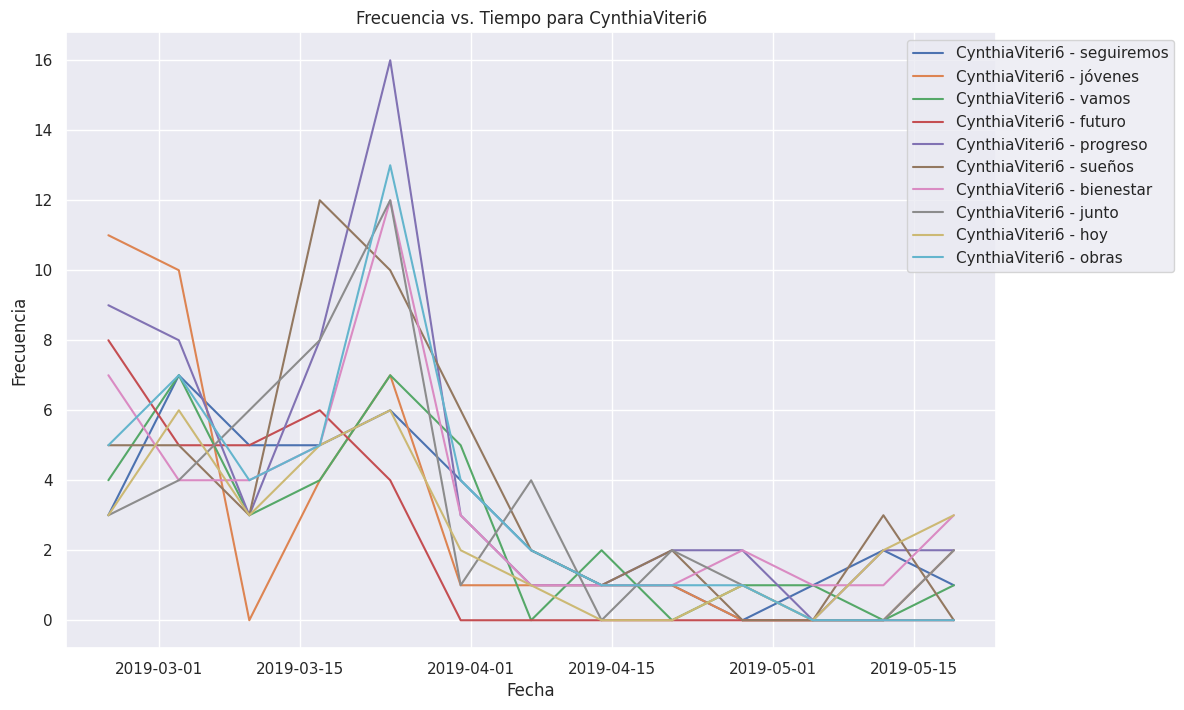

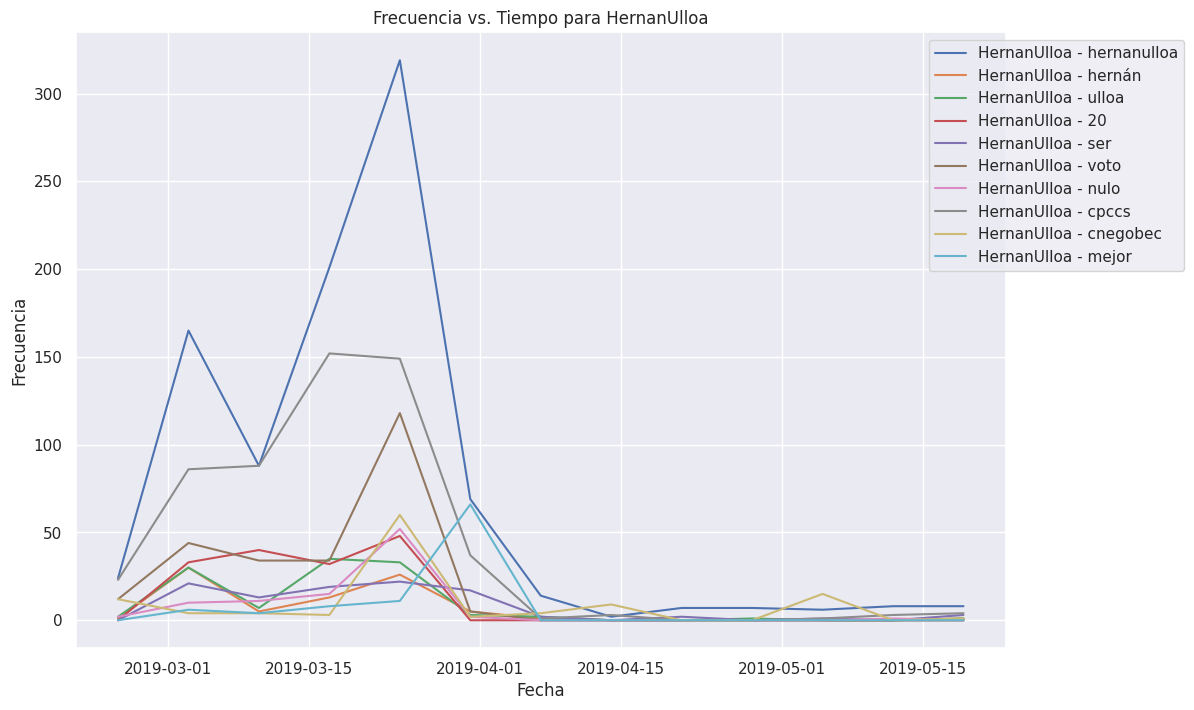

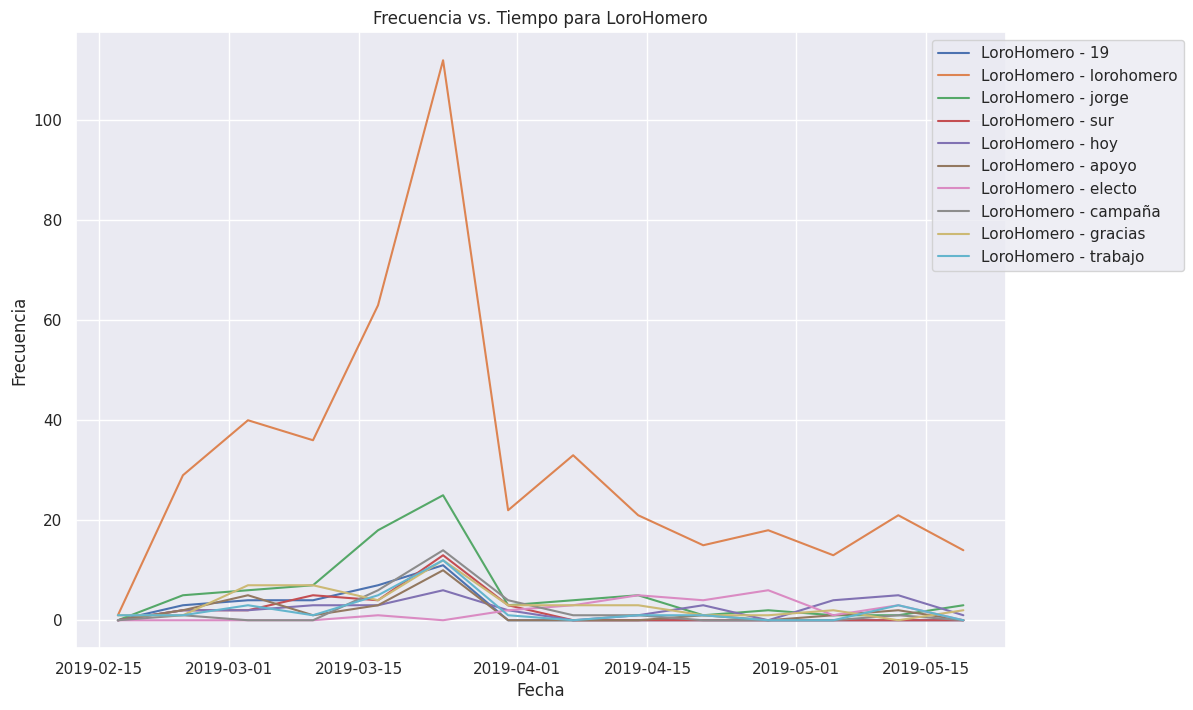

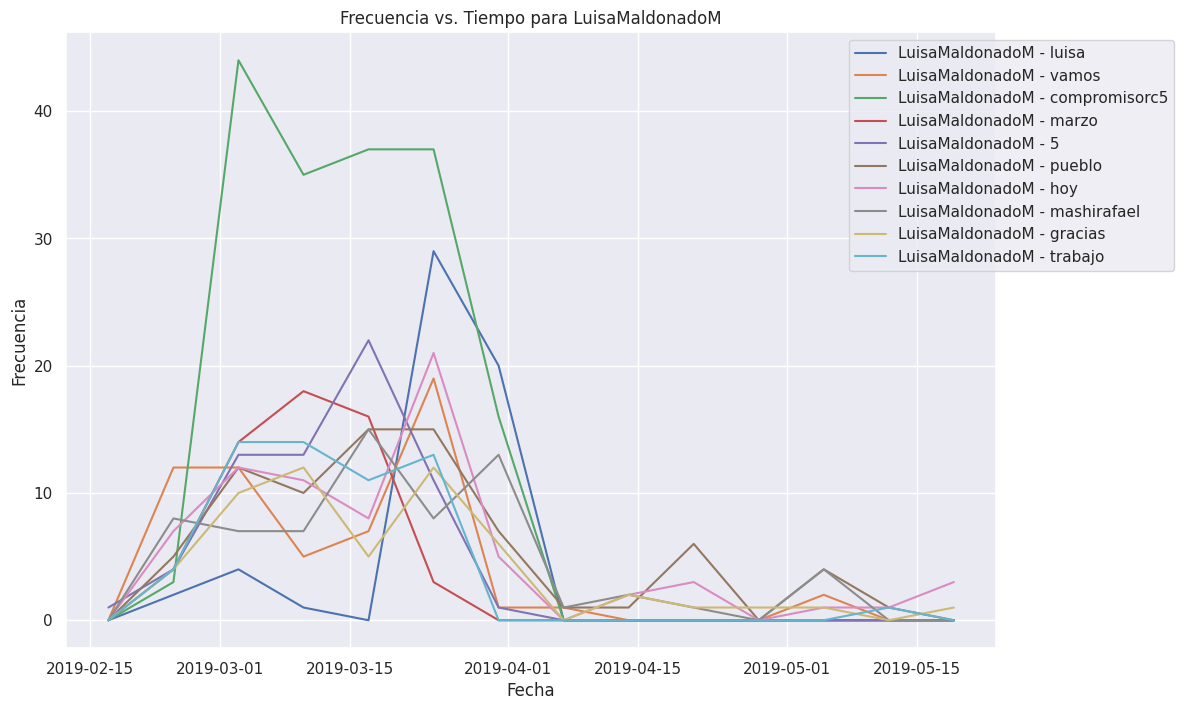

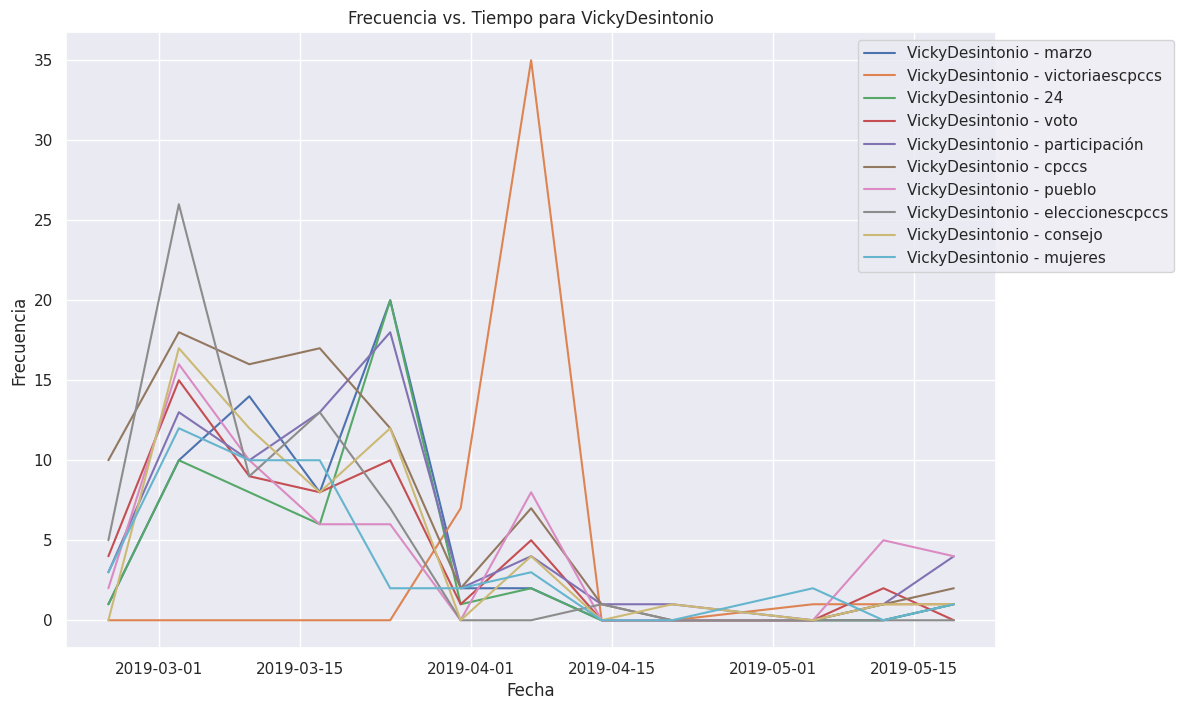

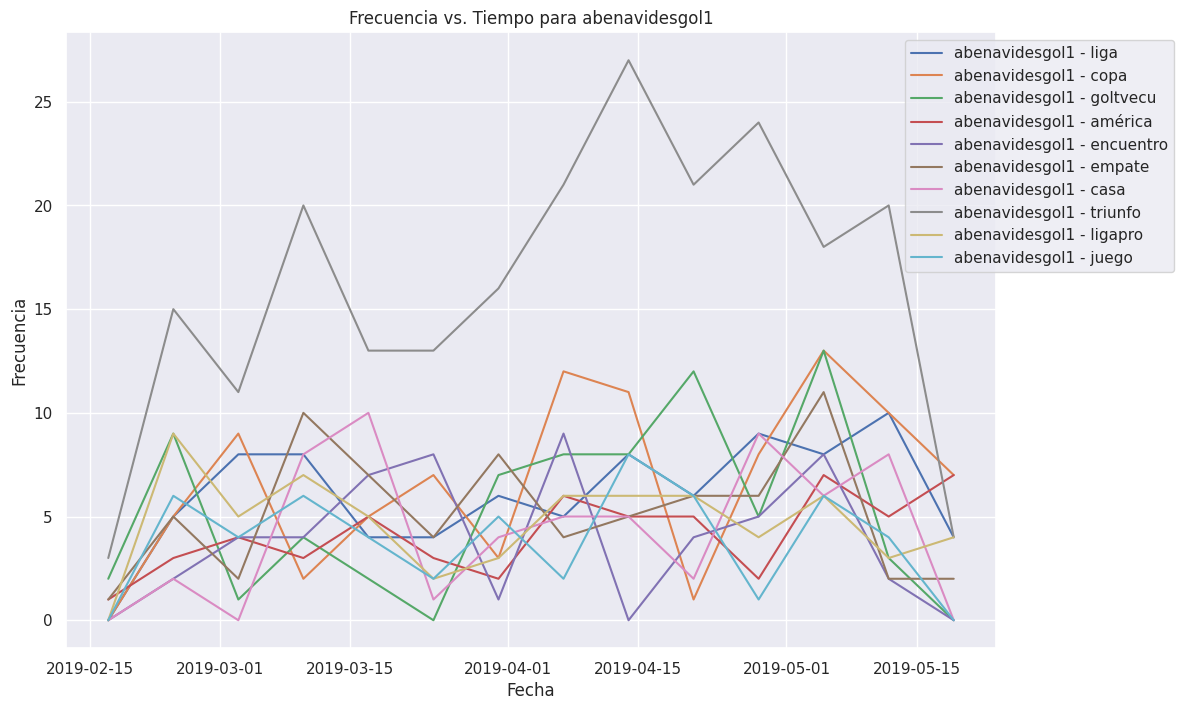

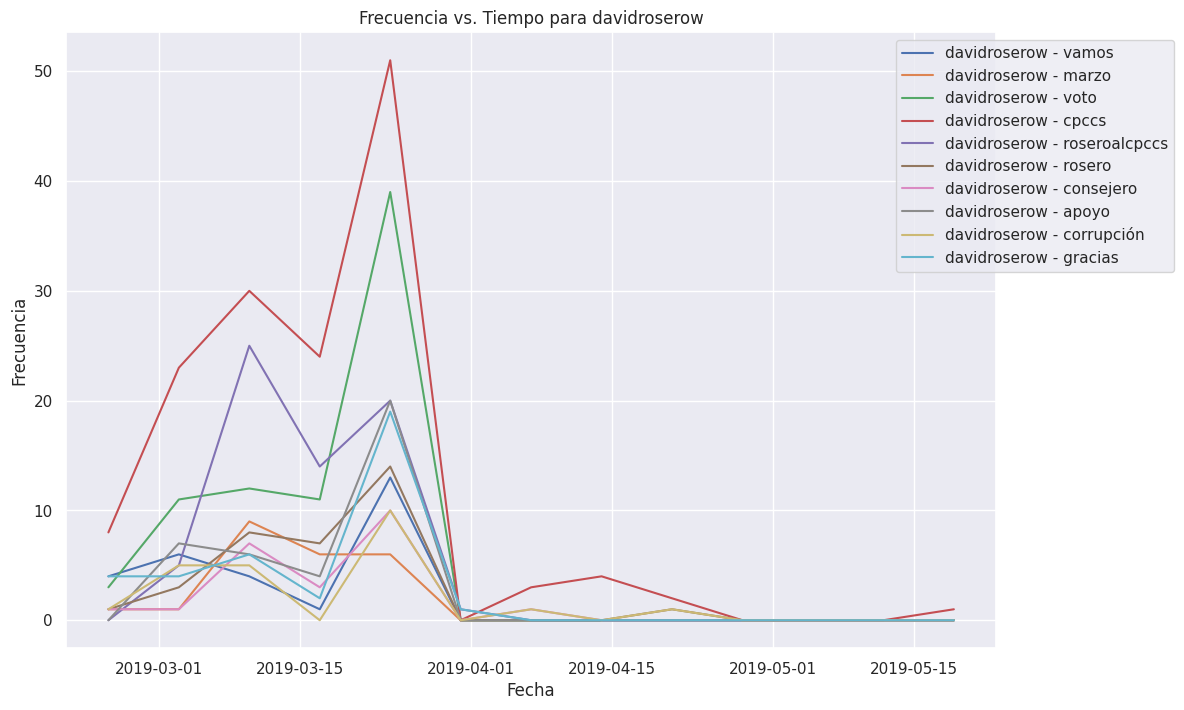

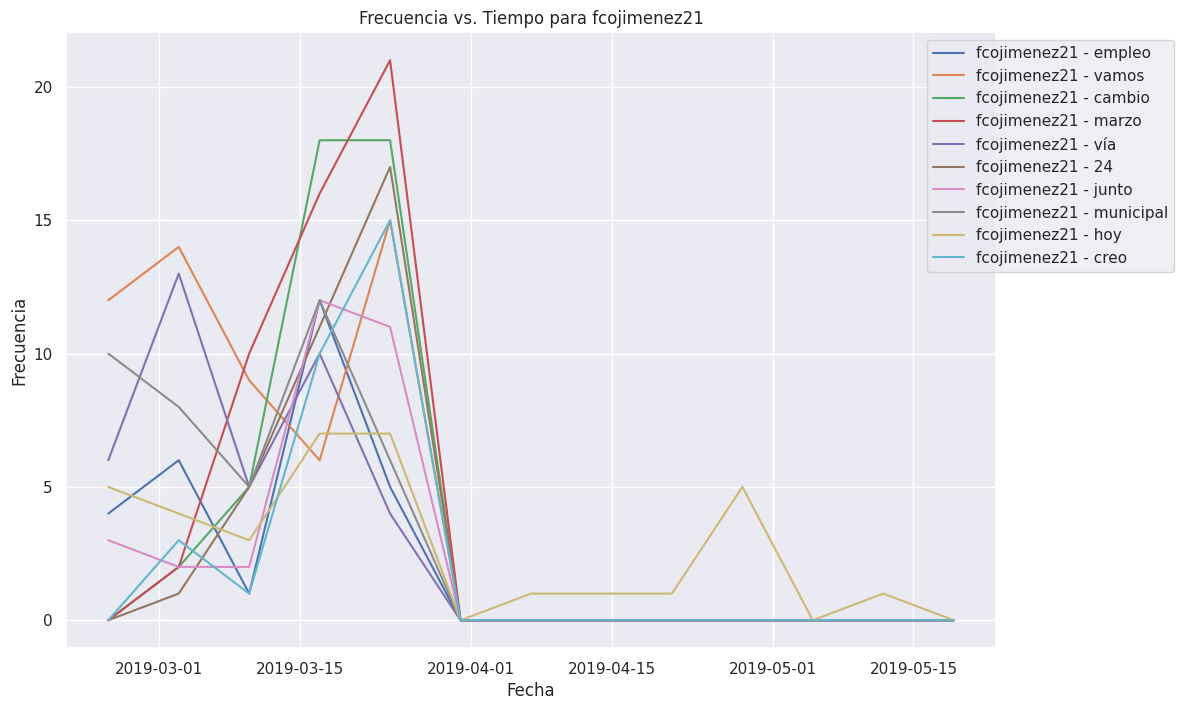

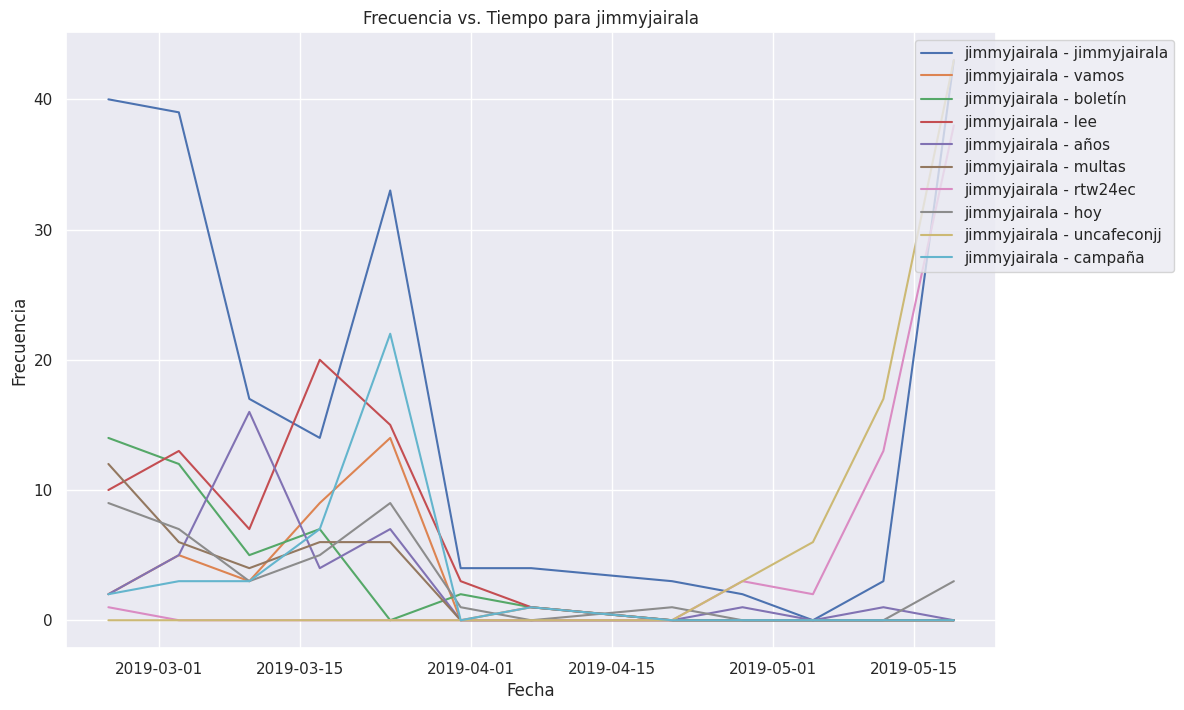

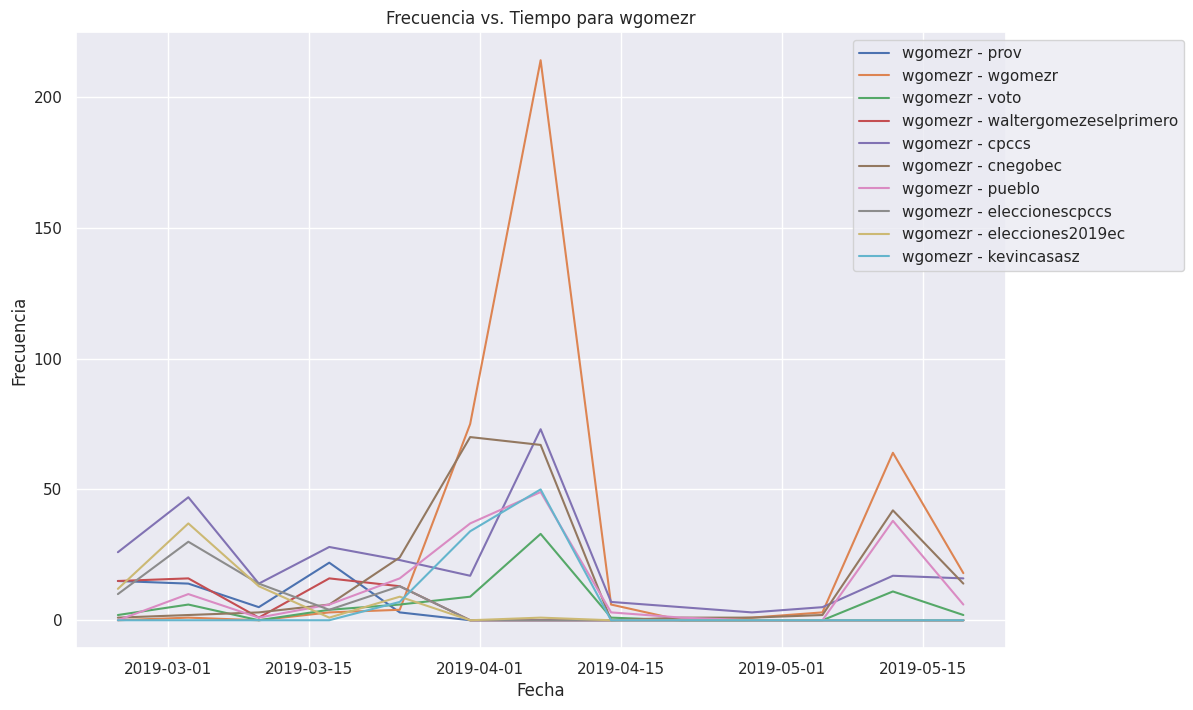

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de la gráfica
sns.set(style="darkgrid")

# Obtener la lista de candidatos únicos
candidatos_unicos = agrupado_por_semana['tweet_screen_name'].unique()

# Definir el número de palabras más relevantes a mostrar
num_palabras_relevantes = 10

# Crear un gráfico por cada candidato
for candidato in candidatos_unicos:
    plt.figure(figsize=(12, 8))
    plt.title(f'Frecuencia vs. Tiempo para {candidato}')

    # Filtrar el DataFrame por candidato
    df_candidato = agrupado_por_semana[agrupado_por_semana['tweet_screen_name'] == candidato]

    # Obtener las palabras más relevantes para el candidato actual
    palabras_relevantes = set()
    for _, row in df_candidato.iterrows():
        palabras_relevantes.update(row['palabras_candidato_frecuencia'].keys())
        if len(palabras_relevantes) >= num_palabras_relevantes:
            break

    # Iterar sobre las palabras relevantes y trazar las frecuencias
    for palabra in palabras_relevantes:
        plt.plot(df_candidato['tweet_date'], df_candidato['palabras_candidato_frecuencia'].apply(lambda x: x.get(palabra, 0)), label=f"{candidato} - {palabra}")

    # Configurar etiquetas y leyenda
    plt.xlabel('Fecha')
    plt.ylabel('Frecuencia')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

    # Mostrar el gráfico
    plt.show()

In [ ]:
#--------------------------------LITERAL D-----------------------------------

from sklearn.feature_extraction.text import CountVectorizer

# Asumiendo que df_tf es tu DataFrame de frecuencia de términos
vocabulario = df_tf.index.tolist()  # Las palabras únicas actúan como el vocabulario


query = input("Ingresa un query: ")


# Creamos un vectorizador usando el vocabulario de las palabras
vectorizador = CountVectorizer(vocabulary=vocabulario, lowercase=False)
vector_usuario = vectorizador.fit_transform([query]).toarray().flatten()

# Preparar la matriz de frecuencias de términos para los candidatos
df_tf_np = df_tf.T.to_numpy()  # Transponemos para tener candidatos como filas

# Función para calcular la similaridad del coseno
def coseno_similaridad(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_a = np.linalg.norm(vector1)
    norm_b = np.linalg.norm(vector2)
    if norm_a == 0 or norm_b == 0:
        return 0
    else:
        return dot_product / (norm_a * norm_b)

# Calcular la similaridad para cada candidato
similaridades = [coseno_similaridad(vector_usuario, candidato_vector) for candidato_vector in df_tf_np]

# Crear DataFrame de similaridades
df_similaridades = pd.DataFrame(similaridades, index=df_tf.columns, columns=["Similaridad"])

# Ordenar los candidatos por similaridad
df_similaridades_sorted = df_similaridades.sort_values(by="Similaridad", ascending=False)

# Mostrar el ranking de candidatos
print(df_similaridades_sorted)

Ingresa un query: vamos
                         Similaridad
fcojimenez21                0.452025
df                          0.351799
CynthiaViteri6              0.266146
LuisaMaldonadoM             0.230557
fcojimenez21(tf-idf)        0.184233
davidroserow                0.144574
jimmyjairala                0.136821
CynthiaViteri6(tf-idf)      0.088097
LuisaMaldonadoM(tf-idf)     0.082251
davidroserow(tf-idf)        0.077244
jimmyjairala(tf-idf)        0.042263
idf                         0.038040
HernanUlloa                 0.000000
HernanUlloa(tf-idf)         0.000000
LoroHomero(tf-idf)          0.000000
wgomezr                     0.000000
VickyDesintonio(tf-idf)     0.000000
abenavidesgol1(tf-idf)      0.000000
abenavidesgol1              0.000000
VickyDesintonio             0.000000
LoroHomero                  0.000000
wgomezr(tf-idf)             0.000000


In [ ]:
#--------------------------------LITERAL E-----------------------------------
df_tf_2 = df_tf.iloc[:, :10]
df_tf_2

df_resultados_sim = pd.DataFrame(index=df_tf_2.index)

# Realizar la multiplicación columna por columna

for col1 in df_tf_2.columns:
    for col2 in df_tf_2.columns:
        nombre_columna = f"{col1}*{col2}"
        df_resultados_sim[nombre_columna] = df_tf_2[col1] * df_tf_2[col2]

#df_resultados_sim
suma_por_columna = df_resultados_sim.sum(axis=0)
#suma_por_columna

# Extraer los nombres de las columnas y las filas
columnas, filas = zip(*(col.split('*') for col in suma_por_columna.index))

# Crear un nuevo DataFrame con el formato deseado
df_reformateado_2 = pd.DataFrame(index=list(set(filas)), columns=list(set(columnas)))

# Llenar el nuevo DataFrame con los valores
for idx in suma_por_columna.index:
    fila, columna = idx.split('*')
    df_reformateado_2.at[fila, columna] = suma_por_columna[idx]

# Imprimir el DataFrame reformateado
df_reformateado_2

,jimmyjairala,fcojimenez21,LuisaMaldonadoM,HernanUlloa,VickyDesintonio,CynthiaViteri6,LoroHomero,davidroserow,abenavidesgol1,wgomezr
jimmyjairala,0.027097,0.001434,0.002345,0.0,0.0,0.008203,0.001152,0.000431,0.0,0.0
fcojimenez21,0.001434,0.007046,0.004239,0.0,0.002198,0.015128,0.000562,0.001247,0.0,0.0
LuisaMaldonadoM,0.002345,0.004239,0.035346,0.0,0.004007,0.016762,0.0037,0.002456,0.0,0.005761
HernanUlloa,0.0,0.0,0.0,0.859289,0.03551,0.0,0.0,0.055026,0.0,0.09894
VickyDesintonio,0.0,0.002198,0.004007,0.03551,0.018197,0.0,0.0,0.008841,0.0,0.018437
CynthiaViteri6,0.008203,0.015128,0.016762,0.0,0.0,0.458119,0.004018,0.003443,0.0,0.0
LoroHomero,0.001152,0.000562,0.0037,0.0,0.0,0.004018,0.11987,0.001362,0.0,0.0
davidroserow,0.000431,0.001247,0.002456,0.055026,0.008841,0.003443,0.001362,0.017481,0.0,0.01942
abenavidesgol1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045226,0.0
wgomezr,0.0,0.0,0.005761,0.09894,0.018437,0.0,0.0,0.01942,0.0,0.127838


In [ ]:
#!pip install pdfquery
!pip install pdfminer.six
!pip install spacy
!python -m spacy download es_core_news_sm

import nltk
nltk.download('wordnet')
import numpy as np
from scipy.sparse import csr_matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 24.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
!pip install scikit-learn


In [ ]:
#preprosesamiento literal F

import numpy as np
import matplotlib.pyplot as plt
import pdfquery
import re
import spacy
from sklearn.feature_extraction.text import CountVectorizer
import io
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
import os

nlp = spacy.load("es_core_news_sm")

folder_path = '/content/drive/My Drive/00_Quito'
manifiestos = ["benavides.pdf", "buendia.pdf", "corral.pdf", "davalos.pdf", "erazo.pdf", "guayaquil.pdf", "holguin.pdf", "jacome.pdf", "maldonado.pdf", "moncayo.pdf", "montufar.pdf", "sarsoza.pdf", "sevilla.pdf", "vazquez.pdf", "vintimilla.pdf", "yunda.pdf", "pasquel.pdf"]
manifiestos_txt = []

for manifesto in manifiestos:
    # Prepend the folder path to each manifesto file name
    manifesto_path = os.path.join(folder_path, manifesto)
    with open(manifesto_path, 'rb') as f:
        resource_manager = PDFResourceManager()
        fake_file_handle = io.StringIO()
        converter = TextConverter(resource_manager, fake_file_handle, laparams=LAParams())
        page_interpreter = PDFPageInterpreter(resource_manager, converter)

        for page in PDFPage.get_pages(f):
            page_interpreter.process_page(page)

        text = fake_file_handle.getvalue()
        manifiestos_txt.append(text)

    converter.close()
    fake_file_handle.close()

# For example: stop_words = spacy.lang.es.stop_words.STOP_WORDS
stop_words = set(spacy.lang.es.stop_words.STOP_WORDS)

def preprocess_text(text):
  # Remove punctuation
  text = re.sub(r'[^a-zA-Z\s]', '', text) # Updated regular expression
  text = text.lower()
  doc = nlp(text)
  # Lemmatize tokens and remove stopwords
  tokens = [token.lemma_ for token in doc if token.text not in stop_words]
  return ' '.join(tokens)

preprocessed_texts = [preprocess_text(text) for text in manifiestos_txt]


vectorizer = CountVectorizer()
document_term_matrix = vectorizer.fit_transform(preprocessed_texts)

print(document_term_matrix)

  (0, 549)	6
  (0, 1086)	2
  (0, 7477)	248
  (0, 3947)	18
  (0, 6815)	309
  (0, 4344)	56
  (0, 377)	7
  (0, 2716)	90
  (0, 378)	8
  (0, 6769)	3
  (0, 6702)	2
  (0, 1085)	4
  (0, 7500)	1
  (0, 1681)	3
  (0, 9303)	7
  (0, 9397)	5
  (0, 5851)	1
  (0, 2509)	11
  (0, 4263)	8
  (0, 3055)	23
  (0, 5863)	27
  (0, 1059)	5
  (0, 5420)	6
  (0, 5198)	3
  (0, 482)	19
  :	:
  (16, 7322)	1
  (16, 4191)	1
  (16, 5489)	1
  (16, 8697)	1
  (16, 3630)	1
  (16, 3202)	1
  (16, 2019)	1
  (16, 2598)	1
  (16, 2594)	1
  (16, 5101)	1
  (16, 1712)	1
  (16, 3101)	1
  (16, 9302)	1
  (16, 8085)	1
  (16, 8570)	1
  (16, 5563)	1
  (16, 7149)	1
  (16, 5652)	1
  (16, 3088)	1
  (16, 7046)	1
  (16, 848)	1
  (16, 636)	1
  (16, 2265)	1
  (16, 1624)	1
  (16, 8013)	1


In [ ]:


from sklearn.metrics.pairwise import euclidean_distances

vector_colectivo = np.asarray(document_term_matrix.mean(axis=0)).reshape(1, -1)
distancias = euclidean_distances(document_term_matrix,
                                 vector_colectivo)
distancias = distancias.flatten()

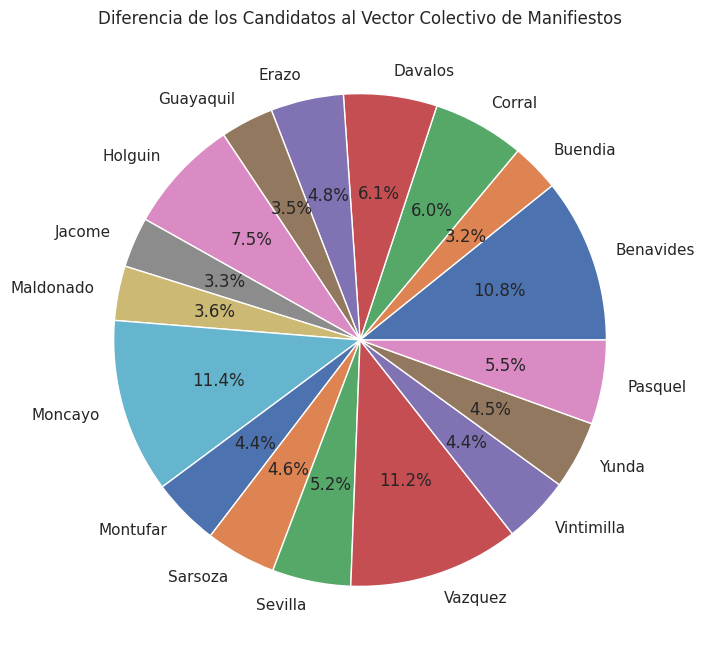

In [ ]:
nombres_candidatos = [
    "Benavides",
    "Buendia",
    "Corral",
    "Davalos",
    "Erazo",
    "Guayaquil",
    "Holguin",
    "Jacome",
    "Maldonado",
    "Moncayo",
    "Montufar",
    "Sarsoza",
    "Sevilla",
    "Vazquez",
    "Vintimilla",
    "Yunda",
    "Pasquel"
]


plt.figure(figsize=(10, 8))
plt.pie(distancias, labels=nombres_candidatos, autopct='%1.1f%%')
plt.title('Diferencia de los Candidatos al Vector Colectivo de Manifiestos')
plt.show()